In [7]:
import numpy as np
import matplotlib.pyplot as plt
import cv2


def NMS(img, bbox, confidence_score, threshold):
    """
    步驟：
        - 挑選信心度最大的bbo，加入到「確定是物件的集合」中
        - 剛挑選出的bbox與其餘的bbox計算IOU
            - 計算overlap面積（先取得overlap的座標）
        - 不考慮IOU大於threshold的物件
    """
    # 最終結果
    picked_bbox = []
    picked_socre = []
    
    # 轉成numpy
    boxes = np.array(bbox)
    score = np.array(confidence_score)
    
    # bbox座標，為了之後方便計算IoU
    start_x = boxes[:,0]
    start_y = boxes[:,1]
    end_x = boxes[:,2]
    end_y = boxes[:,3]
    
    # bbox面積
    # w*h
    area = (end_x-start_x+1) * (end_y-start_y+1) 
    
    # 根據信心程度大小排序，返回index
    # np.argsort由小到大排序
    order = np.argsort(score)
    
    # 檢查完所有bbox就結束
    while order.size > 0:
        # 挑選信心度最大的加入到集合中
        index = order[-1]
        
        # 接著挑選出信心程度最高的BBox，並加入到「確定是物件的集合」中
        picked_bbox.append(bbox[index])
        picked_socre.append(confidence_score[index])
        
        # 先取得overlap的座標
        x1 = np.maximum(start_x[index], start_x[order[:-1]])
        y1 = np.maximum(start_y[index], start_y[order[:-1]])
        x2 = np.minimum(end_x[index], end_x[order[:-1]])
        y2 = np.minimum(end_y[index], end_y[order[:-1]])
    
        # 計算overlap面積
        w = np.maximum(0.0, (x2-x1+1))
        h = np.maximum(0.0, (y2-y1+1))
        overlap = w * h
        
        # 剛挑選出的bbox與其餘的bbox計算IOU
        IoU = overlap / (area[index] + area[order[:-1]] - overlap)
        
        # 不考慮IOU大於threshold的物件
        left = np.where(IoU < threshold)
        order = order[left]
    
    return picked_bbox, picked_socre
    

def plot_img(img, bbox, confidence_score):
    """
    將候選框及信心程度畫在影像上
    (w,h), baseLine = cv2.getTextSize(text, fontFace, fontScale, thickness) 用於計算文本的長寬
    (w,h)：文本的長寬
    baseLine：文本最底端文本的y座標，文本的高是從baseLine到文本最頂端

    """
    fontFace = cv2.FONT_HERSHEY_SIMPLEX
    fontScale = 1
    thickness = 2
    
    for (start_x, start_y, end_x, end_y), score in zip(bbox, confidence_score):
        (w, h), basline = cv2.getTextSize(str(score), fontFace, fontScale, thickness)
        cv2.rectangle(img, (start_x, start_y-h),(start_x+w, start_y),(0,255,0), -1) # 文字框，負值代表填滿
        cv2.rectangle(img, (start_x, start_y,), (end_x, end_y), (0,255,0), 2) # 物件框
        cv2.putText(img, str(score), (start_x, start_y), fontFace, fontScale, (0,0,0), 2)
        
    plt.imshow(img[:,:,::-1])
    plt.show()

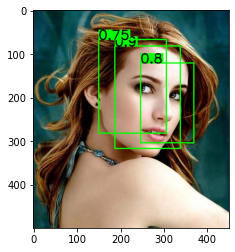

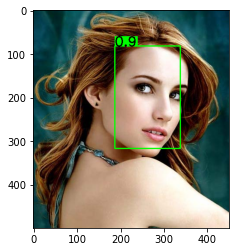

In [9]:
if __name__ == "__main__":
    img = cv2.imread('./girl.jpeg')
    org = img.copy()
    bbox = [(187, 82, 337, 317), (150, 67, 305, 282), (246, 121, 368, 304)]
    confidence_score = [0.9, 0.75, 0.8]
    threshold = 0.4
    plot_img(org, bbox, confidence_score)
    
    picked_bbox, picked_socre = NMS(img, bbox, confidence_score, threshold)
    plot_img(img, picked_bbox, picked_socre)